In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CodSoft 2024/Customer Churns Prediction/Churn_Modelling.csv').dropna(axis=1)

In [ ]:
data.drop(columns=['Surname', 'RowNumber', 'CustomerId'], inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample data
data1 = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Female'],
    'Exited': ['No', 'Yes', 'No', 'Yes', 'No'],
    'Geography': ['France', 'Spain', 'France', 'Germany', 'Spain']
}

# Convert lists to value counts for plotting
gender_counts = pd.Series(data['Gender']).value_counts()
exited_counts = pd.Series(data['Exited']).value_counts()
geography_counts = pd.Series(data['Geography']).value_counts()

# Labels for the pies
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
geo_labels = geography_counts.index.tolist()

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=g_labels, values=gender_counts, name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=exited_counts, name="Exited"),
              1, 2)
fig.add_trace(go.Pie(labels=geo_labels, values=geography_counts, name="Geography"),
              2, 1)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender, Exited, and Geography Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.82, font_size=20, showarrow=False),
                 dict(text='Exited', x=0.84, y=0.82, font_size=20, showarrow=False),
                 dict(text='Geography', x=0.16, y=0.18, font_size=20, showarrow=False)
                 ])
fig.show()


In [ ]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data["Exited"][data["Exited"]==0].groupby(by=data["Gender"]).count()

Gender
Female    3404
Male      4559
Name: Exited, dtype: int64

In [ ]:
fig = px.histogram(data, x="Exited", color="Geography", barmode="group", title="Customer georaphy distribution")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

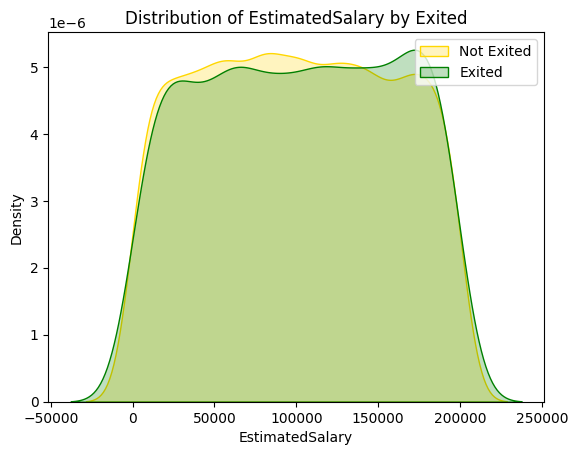

In [ ]:
ax = sns.kdeplot(data.EstimatedSalary[(data["Exited"] == 0) ],
                color="Gold", shade = True);
ax = sns.kdeplot(data.EstimatedSalary[(data["Exited"] == 1) ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Exited","Exited"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('EstimatedSalary');
ax.set_title('Distribution of EstimatedSalary by Exited');

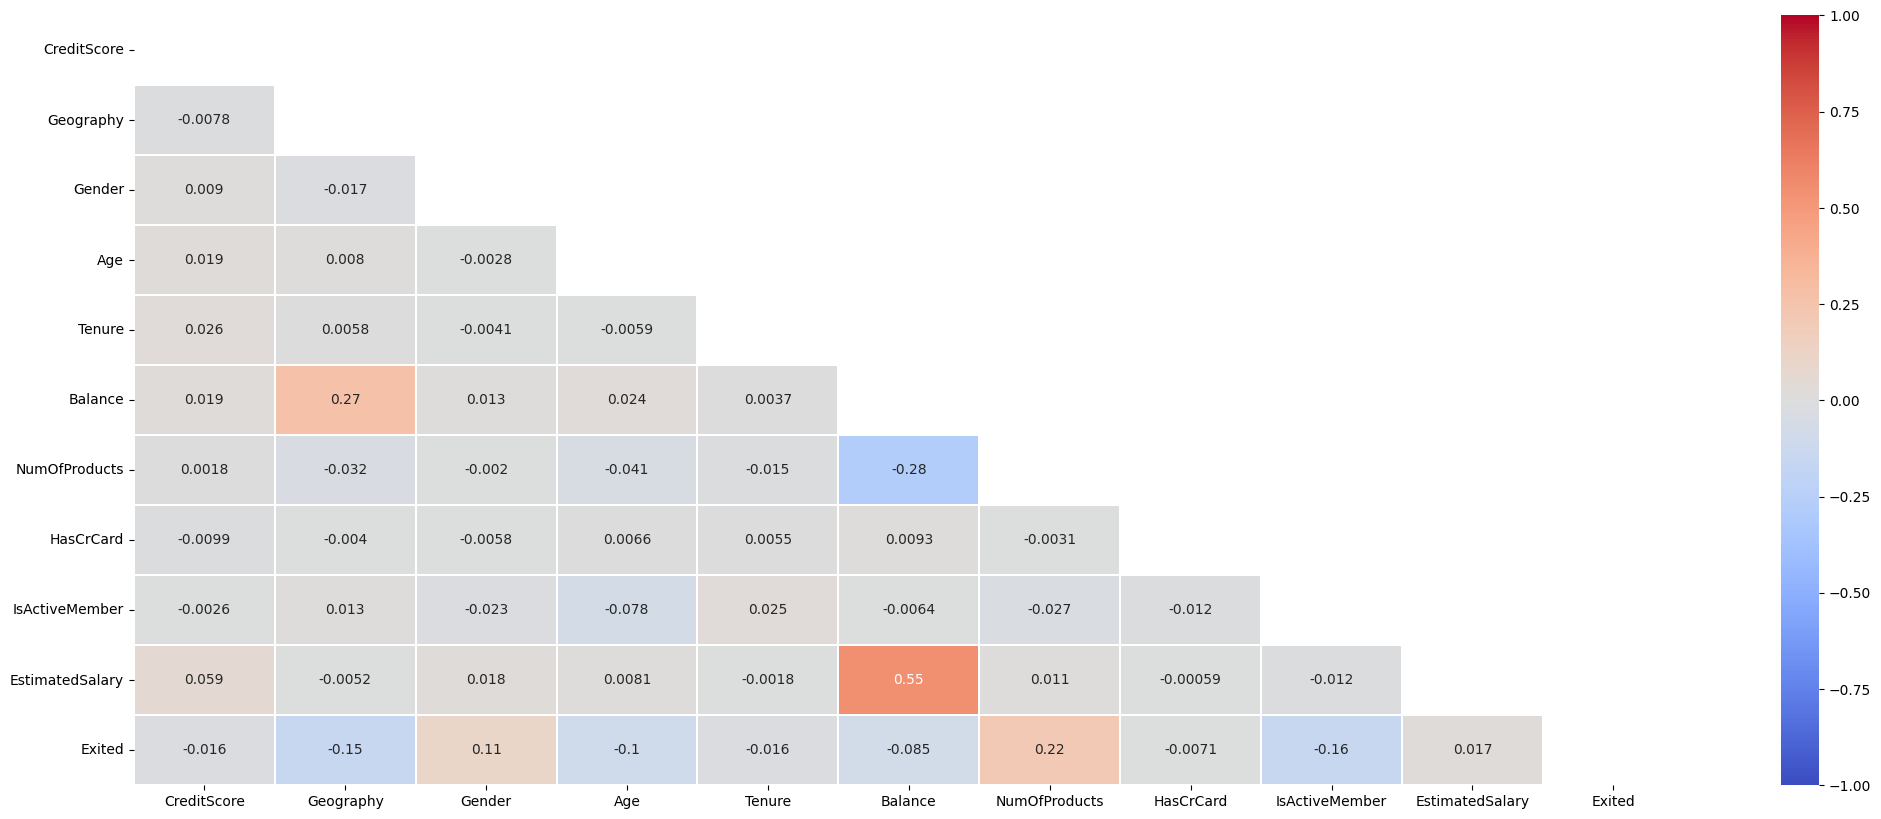

In [ ]:
plt.figure(figsize=(25, 10))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
data = pd.get_dummies(data, columns=['Geography', 'Gender'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  bool   
 10  Geography_Germany  10000 non-null  bool   
 11  Geography_Spain    10000 non-null  bool   
 12  Gender_Female      10000 non-null  bool   
 13  Gender_Male        10000 non-null  bool   
dtypes: bool(5), float64(2), int64(7)
memory usage: 752.1 KB


In [ ]:
churn_count = data['Exited'].value_counts()
print(churn_count)

Exited
0    7963
1    2037
Name: count, dtype: int64


In [ ]:
temp_df = pd.DataFrame({
    'Exited':churn_count.index,
    'Counts': churn_count.values
})

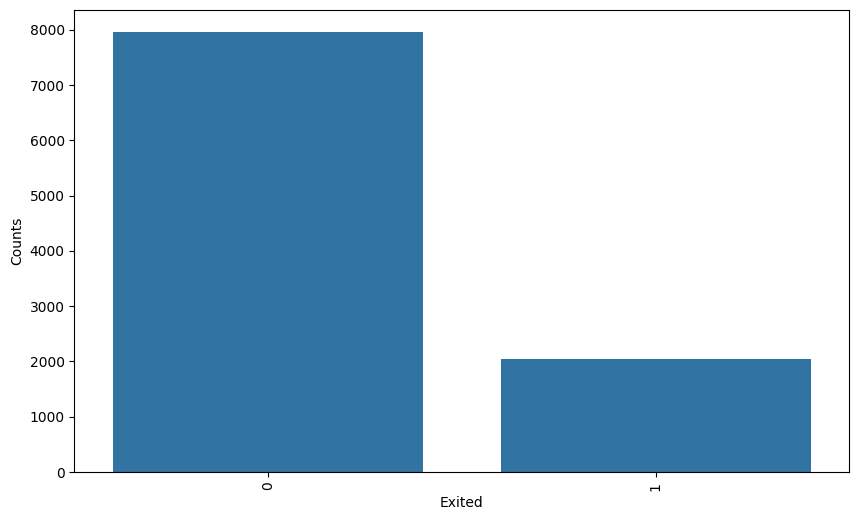

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Exited', y='Counts', data=temp_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(8000, 13)
(2000, 13)


In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print(X_test.shape)
print(X_val.shape)

(1000, 13)
(1000, 13)


In [ ]:
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [0.545 0.545 0.545 0.546 0.546 0.546 0.546 0.546 0.546 0.546]
Mean Score: 0.5457000000000001
Gaussian NB
Scores: [0.619 0.591 0.619 0.603 0.639 0.613 0.614 0.616 0.607 0.592]
Mean Score: 0.6113
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


From the above output we notice that our Random Forest Classifier is performing very well and the mean score after K-fold Cross Validation is also very high, so we will fill the data on Random Forest Classifier Algorithm.

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


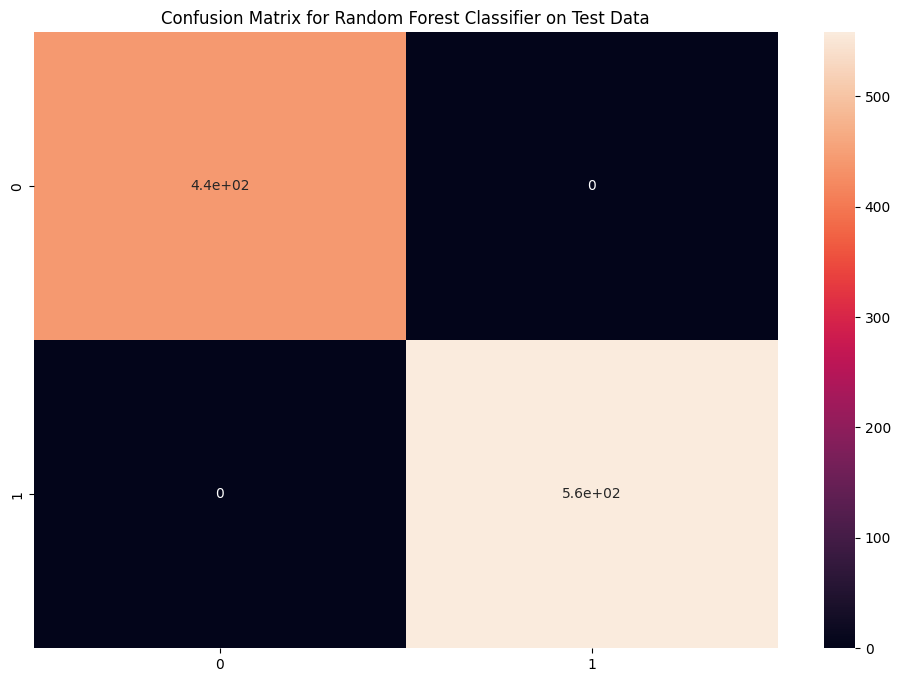

In [ ]:
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_val)
print(f"Accuracy on train data by Random Forest Classifier: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_val, preds)*100}")

cf_matrix = confusion_matrix(y_val, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

Accuracy of the model on test dataset: 1.0
Confusion Matrix:
[[463   0]
 [  0 537]]
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       463
        True       1.00      1.00      1.00       537

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



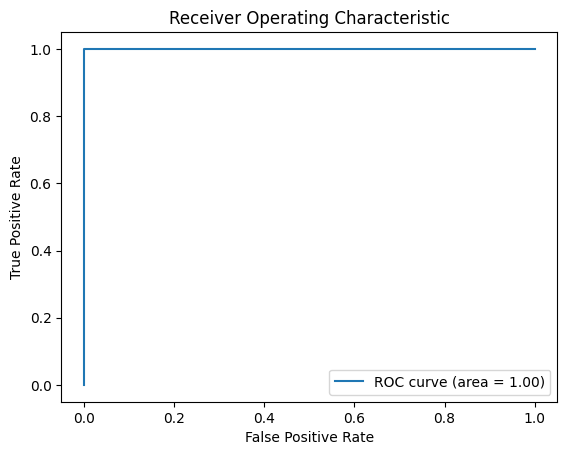

In [ ]:
#Now predicting on test dataset
y_pred = rf_model.predict(X_test)
print(f"Accuracy of the model on test dataset: {accuracy_score(y_test, y_pred)}")

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

#Classification Report
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

#ROC Curve and AUC
y_proba = rf_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(f"Accuracy on train data by Random Forest Classifier: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

Accuracy on train data by Random Forest Classifier: 100.0
